## Construct allele by similarity allele table

In [2]:
import os 
import sys
from cphasing.core import AlleleTable 
import igraph
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import pandas as pd 

In [40]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/AT_remove_inter_f0.9/12/n50_500k/test_pipeline/test_collapse")

In [41]:
at = AlleleTable("collapse.allele.table", fmt="allele2", sort=False)

In [42]:
at.data

,1,2,mz1,mz2,mzShared,similarity,strand
0,1A.ctg1,1B.ctg1,45334,52723,41805,0.991646,1
1,1A.ctg1,1C.ctg1,45334,297612,42989,0.929773,1
2,1A.ctg1,1D.ctg1|collapse:1E.ctg1,45334,17973,17117,0.968161,1
3,1A.ctg1,1D.ctg2,45334,29581,26000,0.980967,1
4,1A.ctg1,1E.ctg2,45334,49831,26318,0.969312,1
...,...,...,...,...,...,...,...
64095,5L.ctg60,5E.ctg67,12057,308705,11719,0.871358,1
64096,5L.ctg60,5F.ctg66|collapse:5H.ctg66_5I.ctg56,12057,20427,11859,0.983583,1
64097,5L.ctg60,5G.ctg65,12057,17898,11090,0.984308,1
64098,5L.ctg60,5J.ctg58,12057,38996,11131,0.957257,1


In [11]:
at.data[[1, 2]].values.tolist()

[['1E.ctg1', '1F.ctg1'],
 ['1E.ctg1', '1F.ctg2'],
 ['1E.ctg2', '1F.ctg2'],
 ['1E.ctg2', '1F.ctg3'],
 ['1E.ctg2', '1F.ctg4'],
 ['1E.ctg3', '1F.ctg4'],
 ['1E.ctg3', '1F.ctg5'],
 ['1E.ctg4', '1F.ctg5'],
 ['1E.ctg4', '1F.ctg6'],
 ['1E.ctg5', '1F.ctg6'],
 ['1E.ctg5', '1F.ctg7'],
 ['1E.ctg6', '1F.ctg7'],
 ['1E.ctg6', '1F.ctg8'],
 ['1E.ctg7', '1F.ctg8'],
 ['1E.ctg7', '1F.ctg9'],
 ['1E.ctg8', '1F.ctg9'],
 ['1E.ctg8', '1F.ctg10'],
 ['1E.ctg9', '1F.ctg10'],
 ['1E.ctg9', '1F.ctg11'],
 ['1E.ctg9', '1F.ctg12'],
 ['1E.ctg10', '1F.ctg12'],
 ['1E.ctg10', '1F.ctg13'],
 ['1E.ctg11', '1F.ctg13'],
 ['1E.ctg11', '1F.ctg14'],
 ['1E.ctg12', '1F.ctg14'],
 ['1E.ctg12', '1F.ctg15'],
 ['1E.ctg13', '1F.ctg15'],
 ['1E.ctg13', '1F.ctg16'],
 ['1E.ctg13', '1F.ctg17'],
 ['1E.ctg14', '1F.ctg17'],
 ['1E.ctg15', '1F.ctg17'],
 ['1E.ctg15', '1F.ctg18'],
 ['1E.ctg16', '1F.ctg18'],
 ['1E.ctg16', '1F.ctg19'],
 ['1E.ctg16', '1F.ctg20'],
 ['1E.ctg17', '1F.ctg20'],
 ['1E.ctg17', '1F.ctg21'],
 ['1E.ctg18', '1F.ctg21'],
 ['1E.ctg1

In [43]:
idx_db = dict(zip(range(len(at.contigs)), sorted(at.contigs)))
contig_idx_db = dict(zip( sorted(at.contigs), range(len(at.contigs))))
l = list(zip(at.data[1].map(contig_idx_db.get), at.data[2].map(contig_idx_db.get)))


In [56]:
at.data

,1,2,mz1,mz2,mzShared,similarity,strand
0,1A.ctg1,1B.ctg1,45334,52723,41805,0.991646,1
1,1A.ctg1,1C.ctg1,45334,297612,42989,0.929773,1
2,1A.ctg1,1D.ctg1|collapse:1E.ctg1,45334,17973,17117,0.968161,1
3,1A.ctg1,1D.ctg2,45334,29581,26000,0.980967,1
4,1A.ctg1,1E.ctg2,45334,49831,26318,0.969312,1
...,...,...,...,...,...,...,...
64095,5L.ctg60,5E.ctg67,12057,308705,11719,0.871358,1
64096,5L.ctg60,5F.ctg66|collapse:5H.ctg66_5I.ctg56,12057,20427,11859,0.983583,1
64097,5L.ctg60,5G.ctg65,12057,17898,11090,0.984308,1
64098,5L.ctg60,5J.ctg58,12057,38996,11131,0.957257,1


In [57]:
g = igraph.Graph(n=len(at.contigs))
g.add_edges(l)
g.es['weight'] = at.data['mzShared']
g = g.simplify()

In [7]:
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

In [8]:
num_communities = len(communities)
palette = igraph.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

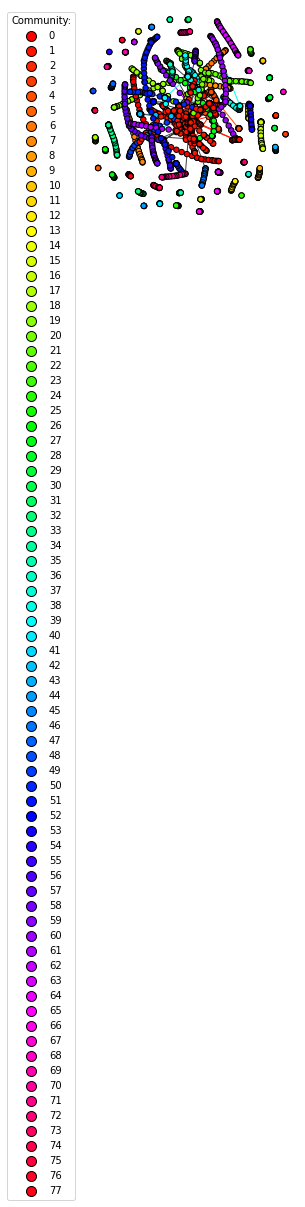

In [9]:
fig, ax = plt.subplots()
igraph.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)

In [58]:
for _g in communities.subgraphs():
    if _g.vcount() > 50:
        break
        print(_g.vcount())

(4, 10)
(5, 12)
(4, 12)
(4, 11)
(2, 9)
(2, 8)
(1, 8)
(0, 6)
(0, 7)
(0, 8)
(3, 10)
(3, 9)


In [58]:
cliques = g.maximal_cliques()

In [78]:
cached_set = set()
for i, clique in enumerate(map(sorted, cliques)):
    # print("\t".join(idx_db[i] for i in clique))
    if len(clique) < 2:
        continue

    clique = tuple(clique)
    if clique in cached_set:
        continue 
    print("\t".join(idx_db[i] for i in clique))
    cached_set.add(clique)
    # if len(clique) <= 12:    
    #     print("\t".join(idx_db[i] for i in clique))

4B.ctg1	4D.ctg1	4E.ctg1	4G.ctg1	4H.ctg1	4J.ctg1
4B.ctg2	4D.ctg1	4E.ctg1	4G.ctg1	4H.ctg1	4J.ctg1
4B.ctg2	4D.ctg2	4E.ctg1	4G.ctg1	4H.ctg1	4J.ctg1
5A.ctg26	5B.ctg24	5G.ctg30	5J.ctg25	5K.ctg23	5L.ctg31|collapse:5H.ctg28
5A.ctg26	5B.ctg25	5G.ctg30	5J.ctg25	5K.ctg23	5L.ctg31|collapse:5H.ctg28
4B.ctg2	4D.ctg2	4E.ctg2	4G.ctg1	4H.ctg1	4J.ctg1	4L.ctg2
1A.ctg69	1B.ctg74|collapse:1G.ctg80_1I.ctg57	1C.ctg75	1D.ctg65	1E.ctg69	1F.ctg78	1H.ctg67	1K.ctg79
5A.ctg1	5B.ctg1	5C.ctg1|collapse:5F.ctg1	5D.ctg1	5G.ctg1	5J.ctg1	5K.ctg1	5L.ctg1
5B.ctg55	5D.ctg65	5E.ctg67	5F.ctg66|collapse:5H.ctg66_5I.ctg56	5G.ctg64	5J.ctg58	5K.ctg70	5L.ctg59
5B.ctg55	5D.ctg65	5E.ctg67	5F.ctg66|collapse:5H.ctg66_5I.ctg56	5G.ctg65	5J.ctg58	5K.ctg70	5L.ctg59
5B.ctg55	5D.ctg66	5E.ctg67	5F.ctg66|collapse:5H.ctg66_5I.ctg56	5G.ctg65	5J.ctg58	5K.ctg70	5L.ctg59
5B.ctg55	5D.ctg66	5E.ctg67	5F.ctg66|collapse:5H.ctg66_5I.ctg56	5G.ctg65	5J.ctg58	5K.ctg70	5L.ctg60
1A.ctg68	1B.ctg74|collapse:1G.ctg80_1I.ctg57	1C.ctg75	1D.ctg64	1E.ctg69	1F.ctg76

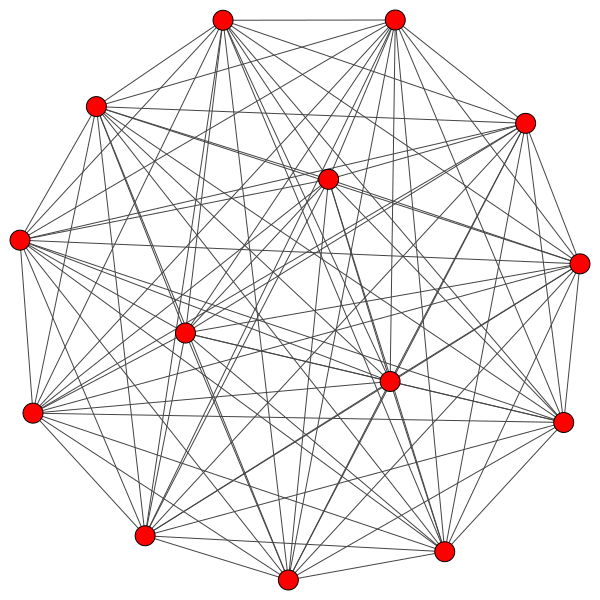

In [70]:
igraph.plot(_g)

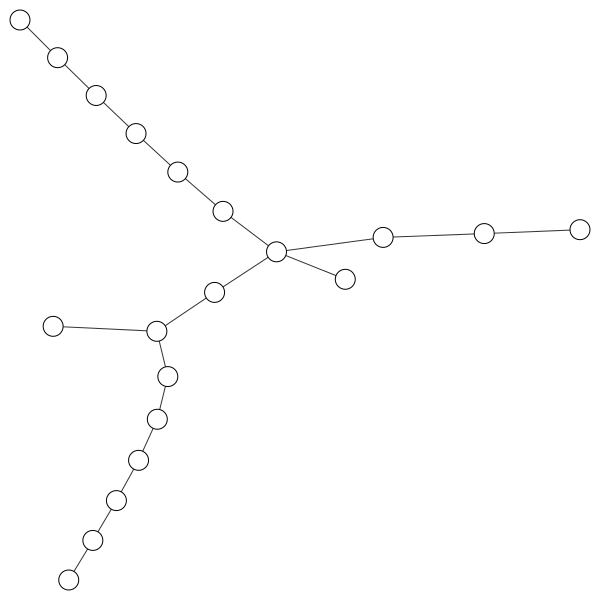

In [24]:
igraph.plot(communities.subgraphs()[50].spanning_tree(), 
             vertex_color="white",
            vetex_label=list(
                pd.DataFrame(zip(at.contigs, communities.membership
                                 )).set_index(1).loc[51].values.flatten()))

In [86]:
__g = communities.subgraphs()[50]


In [21]:
list(pd.DataFrame(zip(at.contigs, communities.membership)).set_index(1).loc[50].values.flatten())

['4F.ctg34',
 '5E.ctg209',
 '5E.ctg144',
 '1E.ctg37',
 '3F.ctg226',
 '3F.ctg202',
 '2E.ctg126',
 '1E.ctg335',
 '5E.ctg183',
 '5F.ctg268',
 '3F.ctg169',
 '5E.ctg124',
 '3E.ctg61',
 '1E.ctg54',
 '3F.ctg19',
 '3E.ctg142',
 '1F.ctg297',
 '2F.ctg67',
 '4F.ctg172',
 '2E.ctg191']

In [26]:
communities.subgraphs()[50].vs